# Desafio Alura Store
- En base a 4 tiendas debemos analisar: facturacion, productos enviados, productos mas vendidos y menos vendidos, calificacion de clientes por tienda

Objetivo

- Analisis de 4 tiendas e identificar cual es la menos eficiente y tomar una desicion en base a los datos

### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
#se improita la herrmaienta matplotlib para el uso de graficas
import matplotlib.pyplot as plt

In [15]:
#se agrupan las base de datos en una sola varia de las listas , agrupando con dataframes por categoria
import pandas as pd

# Concatenar los DataFrames
resumentienda = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)




#1. Análisis de facturación



In [9]:
# se calcula la sumatoria de precio de cada una de las tiendas (facturacion por tienda)
facturacion={
    'tienda 1': tienda['Precio'].apply(lambda x:x).sum()
    ,'tienda 2': tienda2['Precio'].apply(lambda x:x).sum()
    ,'tienda 3': tienda3['Precio'].apply(lambda x:x).sum()
    ,'tienda 4': tienda4['Precio'].apply(lambda x:x).sum()
}


In [10]:

#se calcula la sumatoria totalal de los precios de la lista convinada de todas las tiendas
facturacion_total_de_todas_las_tiendas=resumentienda['Precio'].apply(lambda x:x).sum()

#sseparacion de la tienda con mayor facturacion
tiendademayorfacturacion=max(facturacion,key=facturacion.get)


#porcentaje de facturacion por tienda de acuerdo a la facturacion total
porcentaje_de_facturaciom_por_tienda={
tienda: (facturacion[tienda] * 100) / facturacion_total_de_todas_las_tiendas
    for tienda in facturacion.keys()
}


La facturacion total de todas las tiendas es: $4,403,619,200.00

La tienda que mayor faturacion es: tienda 1, con un monto de facturacion de: $1,150,880,400.00

El porcentaje de facturación de cada tienda es:
tienda 1: 26.13 %
tienda 2: 25.35 %
tienda 3: 24.93 %
tienda 4: 23.58 %


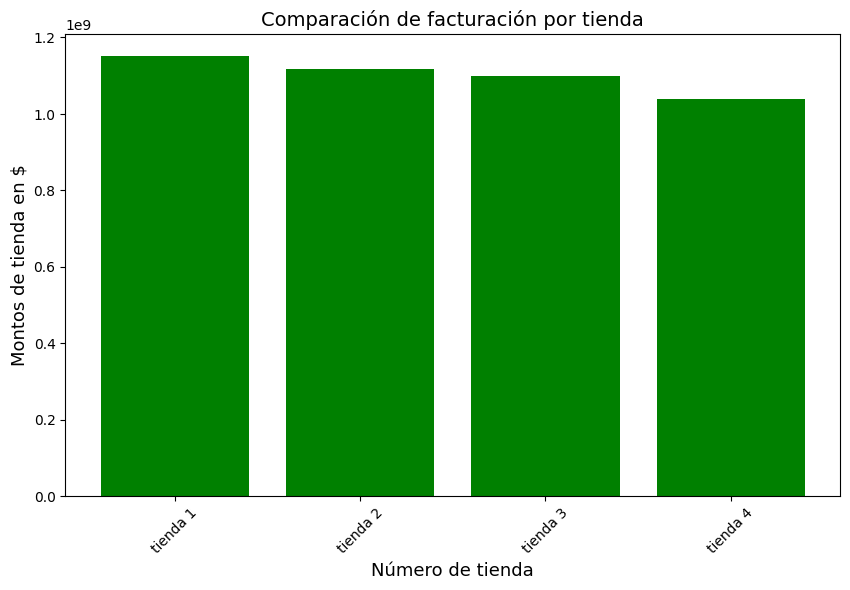

In [11]:
print(f'La facturacion total de todas las tiendas es: ${facturacion_total_de_todas_las_tiendas:,.2f}\n')
print(f'La tienda que mayor faturacion es: {tiendademayorfacturacion}, con un monto de facturacion de: ${facturacion[tiendademayorfacturacion]:,.2f}\n')

# Imprimir en lista los porcentajes de facturación por tienda
print(f'El porcentaje de facturación de cada tienda es:')
for tienda, porcentaje in porcentaje_de_facturaciom_por_tienda.items():
    print(f'{tienda}: {porcentaje:.2f} %')

# Crear la figura con tamaño personalizado
plt.figure(figsize=(10, 6))

# Creación de gráfica de barras para la comparación
plt.bar(facturacion.keys(), facturacion.values(), color='green')

# Título del gráfico
plt.title('Comparación de facturación por tienda', fontsize=14)

# Títulos en eje "x" y "y"
plt.xlabel("Número de tienda", fontsize=13)
plt.ylabel("Montos de tienda en $", fontsize=13)

# Girar etiquetas del eje x si son largas
plt.xticks(rotation=45);






# 2. Ventas por categoría

In [16]:
# Primero, agregamos una columna para identificar la tienda de origen
#  Se vuelve a cargar el DataFrame original desde la fuente

tienda = pd.read_csv(url) # Re-reading the original data from url

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


# Calcular las ventas por tienda y categoría
ventas = resumentienda.groupby(['Tienda', 'Categoría del Producto']).size().unstack()

# Calcular el total de articulos vendidos por tienda
total_productos_vendidos_por_categoria= {
    tienda:df.sum()
    for tienda,df in ventas.items()
}

In [17]:

#tabla de ventas de producto por tienda y categoria
ventas = resumentienda.groupby(['Tienda', 'Categoría del Producto']).size().unstack()
productos_mas_populares = ventas.idxmax(axis=1)
print('Los productos mas populares por tienda son:')
for tienda,producto in productos_mas_populares.items():
  print(f'{tienda}: {producto}')


Los productos mas populares por tienda son:
Tienda 1: Muebles
Tienda 2: Muebles
Tienda 3: Muebles
Tienda 4: Muebles


In [18]:
#se imprime la lista del total de articulos vendidos por categoria convinando las 4 tiendas
print('el totald de articulos vendidas por las 4 tiendas por categoria es:')

for tienda,total in total_productos_vendidos_por_categoria.items():
    print(f"{tienda}: {total} productos\n")


el totald de articulos vendidas por las 4 tiendas por categoria es:
Artículos para el hogar: 730 productos

Deportes y diversión: 1113 productos

Electrodomésticos: 1149 productos

Electrónicos: 1772 productos

Instrumentos musicales: 753 productos

Juguetes: 1290 productos

Libros: 742 productos

Muebles: 1886 productos



# 3. Evaluacion de tienda

In [19]:
#Se hace la clasificacion de la sumatoria por tienda
Calificacion_de_las_tiendas = {
    'tienda1': pd.read_csv(url)['Calificación'].apply(lambda x: x).sum(),
    'tienda2': pd.read_csv(url2)['Calificación'].apply(lambda x: x).sum(),
    'tienda3': pd.read_csv(url3)['Calificación'].apply(lambda x: x).sum(),
    'tienda4': pd.read_csv(url4)['Calificación'].apply(lambda x: x).sum()
}
#Se calcula el largo de las calificaciones en lista
numero_de_reseñas_por_tienda={
    'tienda1': len(pd.read_csv(url)['Calificación']),
    'tienda2': len(pd.read_csv(url2)['Calificación']),
    'tienda3': len(pd.read_csv(url3)['Calificación']),
    'tienda4': len(pd.read_csv(url4)['Calificación']),
}
# Cálculo del promedio en escala 1-5
promedio_de_calificacion_por_tienda = {
    tienda: (Calificacion_de_las_tiendas[tienda] / numero_de_reseñas_por_tienda[tienda])
    for tienda in Calificacion_de_las_tiendas
}

# Mostrar resultados
print('La calificacion promedio de la tienda embase a la opinion de los clientes es:')
for tienda, promedio in promedio_de_calificacion_por_tienda.items():
    print(f'{tienda}: {promedio * 20:.0f}%')

La calificacion promedio de la tienda embase a la opinion de los clientes es:
tienda1: 80%
tienda2: 81%
tienda3: 81%
tienda4: 80%


# 4. Productos más y menos vendidos

# Producto mas vendidos y menos vendidos por categorias

In [20]:
#Calcular el maximo Vendido por categoria
#Donde se utiliza max max para saber el valor de ventas maximo que puede presentar la categoria
ventass_abssolutass=ventas.max().max()
#ordenar las ventas por categoria
Categorias_ordenadas=pd.Series(total_productos_vendidos_por_categoria).sort_values(ascending=False)


Las ventas maximas por categoria en productos son: 499 productos
listado de los productos vendidos por categoria de mayor a menor:

Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
dtype: int64


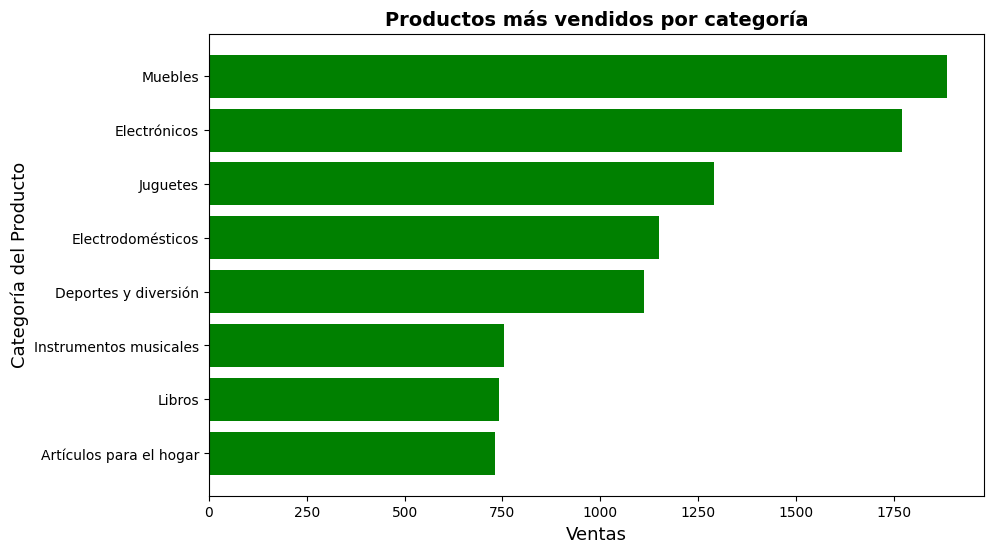

In [21]:
print(f'Las ventas maximas por categoria en productos son: {ventass_abssolutass} productos')
print('listado de los productos vendidos por categoria de mayor a menor:\n')
print(Categorias_ordenadas)
#Creacion de grafico de producto mas vendido
plt.figure(figsize=(10, 6))
plt.barh(Categorias_ordenadas.index, Categorias_ordenadas.values, color='green',);
#forzar el orden
#gca() obtiene el eje actual (Axes) del gráfico.
#invert_yaxis() invierte el orden del eje Y, colocando la primera categoría (la de mayor valor, si está ordenada descendientemente) en la parte superior.
plt.gca().invert_yaxis()

#Etiquetas y titulos
plt.xlabel('Ventas',fontsize=13);
plt.ylabel('Categoría del Producto',fontsize=13);
plt.title('Productos más vendidos por categoría',fontsize=14,fontweight='bold');



# Lista de productos mas vendidos y menos vendidos por tienda





In [22]:
#calcular el producto mas vendido por tienda
producto_mas_vendido_por_tienda = ventas.idxmax()
#candidad mas vendida por tienda
cantidad_mas_vendida_por_tienda=ventas.max()
#calcular el producto menos vendido
producto_meno_vendido_por_tienda=ventas.idxmin()
#cantidad menos vendida por tienda
cantidad_menos_vendida_por_tienda=ventas.min()

#unir los datos en un dataframe
DATA=pd.DataFrame({
    'Producto mas vendidos por tienda':producto_mas_vendido_por_tienda,
    'Cantidad mas vendida':cantidad_mas_vendida_por_tienda,
    'Producto menos vendidos por tienda':producto_meno_vendido_por_tienda,
    'Cantidad menos vendida':cantidad_menos_vendida_por_tienda
})

ordenar_datos=DATA.sort_values(by='Cantidad mas vendida',ascending=False)
#creacion de tabla
from IPython.display import display
display(ordenar_datos)



,Producto mas vendidos por tienda,Cantidad mas vendida,Producto menos vendidos por tienda,Cantidad menos vendida
Categoría del Producto,,,,
Muebles,Tienda 3,499,Tienda 2,442
Electrónicos,Tienda 3,451,Tienda 2,422
Juguetes,Tienda 4,338,Tienda 2,313
Electrodomésticos,Tienda 1,312,Tienda 4,254
Deportes y diversión,Tienda 1,284,Tienda 2,275
Instrumentos musicales,Tienda 2,224,Tienda 4,170
Artículos para el hogar,Tienda 4,201,Tienda 1,171
Libros,Tienda 2,197,Tienda 1,173


Top 10 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


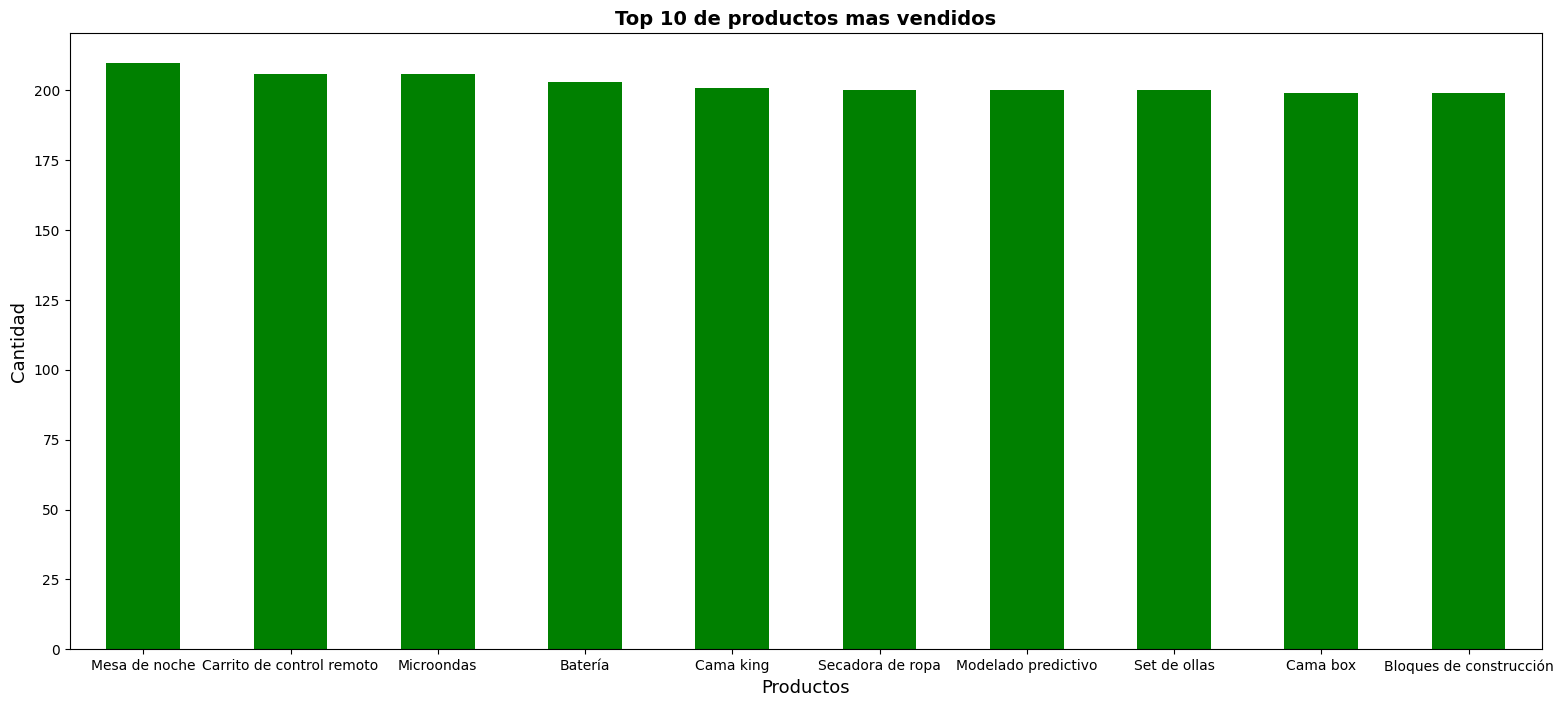

In [23]:
# Contar las veces que se vendió cada producto
productos_mas_vendidos = resumentienda['Producto'].value_counts().head(10)

# Mostrar los 10 más vendidos
print("Top 10 productos más vendidos:")
print(productos_mas_vendidos)

plt.figure(figsize=(19,8));
productos_mas_vendidos.plot(kind='bar', color='green');
#Etiquetas y titulos
plt.xlabel('Productos',fontsize=13);
plt.ylabel('Cantidad',fontsize=13);
plt.title('Top 10 de productos mas vendidos',fontsize=14,fontweight='bold');
plt.xticks(rotation=0);


Top 10 productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


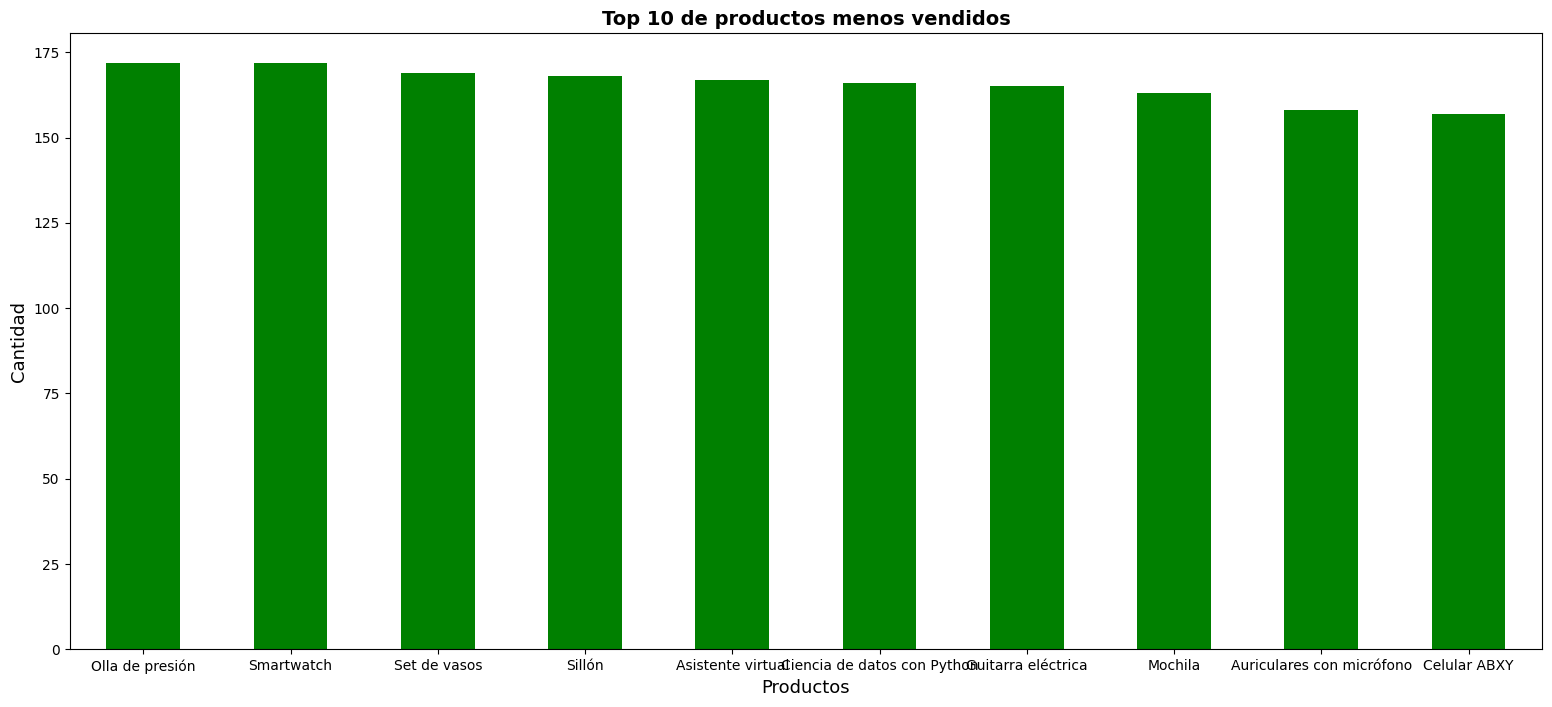

In [24]:
# Contar las veces que se vendió cada producto
productos_mas_vendidos = resumentienda['Producto'].value_counts().tail(10)

# Mostrar los 10 más vendidos
print("Top 10 productos menos vendidos:")
print(productos_mas_vendidos)

plt.figure(figsize=(19,8));
productos_mas_vendidos.plot(kind='bar', color='green');
#Etiquetas y titulos
plt.xlabel('Productos',fontsize=13);
plt.ylabel('Cantidad',fontsize=13);
plt.title('Top 10 de productos menos vendidos',fontsize=14,fontweight='bold');
plt.xticks(rotation=0);



# 5. Envío promedio por tienda

In [25]:
#lugares en los que se enviaron los productos
envios_lugares_enviados=resumentienda['Lugar de Compra'].value_counts()
#envios que realizaron cada tienda
envios_por_tienda=resumentienda['Tienda'].value_counts()
#sumatoria de los envios de tienda
envios_por_tienda_sumatoria=envios_por_tienda.sum()
#promedio de envio por tienda
promediodeenvioportienda=(envios_por_tienda/envios_por_tienda_sumatoria)*100

#se imprime el total de envios por als 4 tiendas
print(f'El total de envios por las cuatro tiendas es: {envios_por_tienda_sumatoria} envios \n')

#impresion de tabla de envios realizados por cada tienda
print('Los envios realizados por cada tienda son:')
for tienda,envios in envios_por_tienda.items():
  print(f'{tienda}: {envios} envios')

#imprimimos la tabla
print("\nLos promedios de envio por tiuenda son:")
for tienda,porcentaje_envios in promediodeenvioportienda.items():
  print(f'{tienda}:{porcentaje_envios:.2f}%')




El total de envios por las cuatro tiendas es: 9435 envios 

Los envios realizados por cada tienda son:
Tienda 1: 2359 envios
Tienda 2: 2359 envios
Tienda 3: 2359 envios
Tienda 4: 2358 envios

Los promedios de envio por tiuenda son:
Tienda 1:25.00%
Tienda 2:25.00%
Tienda 3:25.00%
Tienda 4:24.99%


El costo promedio de loss envios por tienda es de:

Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46




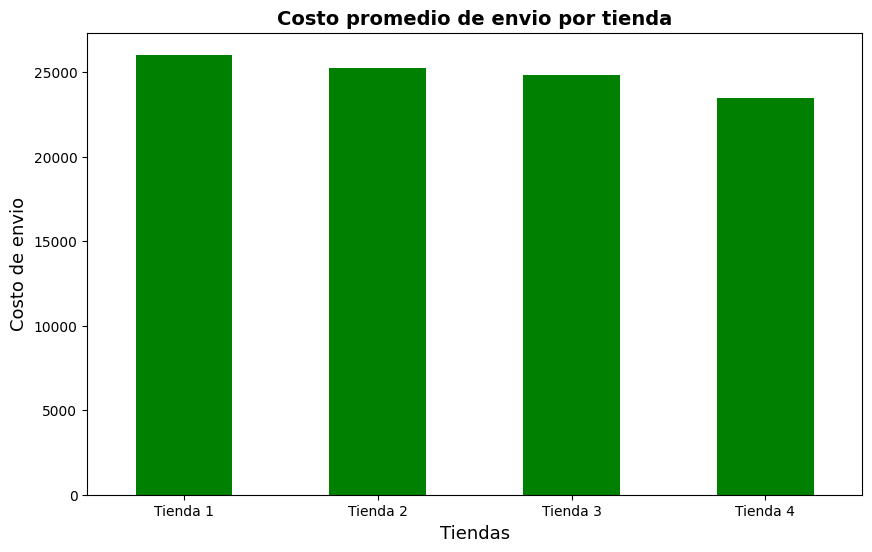

In [33]:
#calculo del costos de envio
Costo_promedio_por_tienda= resumentienda.groupby('Tienda')['Costo de envío'].mean()

#impresion de costo promedio de envio por teinda
print('El costo promedio de loss envios por tienda es de:\n')
Costo_promedio_por_tienda
for Tienda, Costo, in Costo_promedio_por_tienda.items():
  print(f'{Tienda}: ${Costo:.2f}')
print('\n')

#creacion de grafica de costo de envio por tienda
plt.figure(figsize=(10, 6))
Costo_promedio_por_tienda.plot(kind='bar', color='green');
#Etiquetas y titulos
plt.xlabel('Tiendas',fontsize=13);
plt.ylabel('Costo de envio',fontsize=13);
plt.title('Costo promedio de envio por tienda',fontsize=14,fontweight='bold');
plt.xticks(rotation=0);



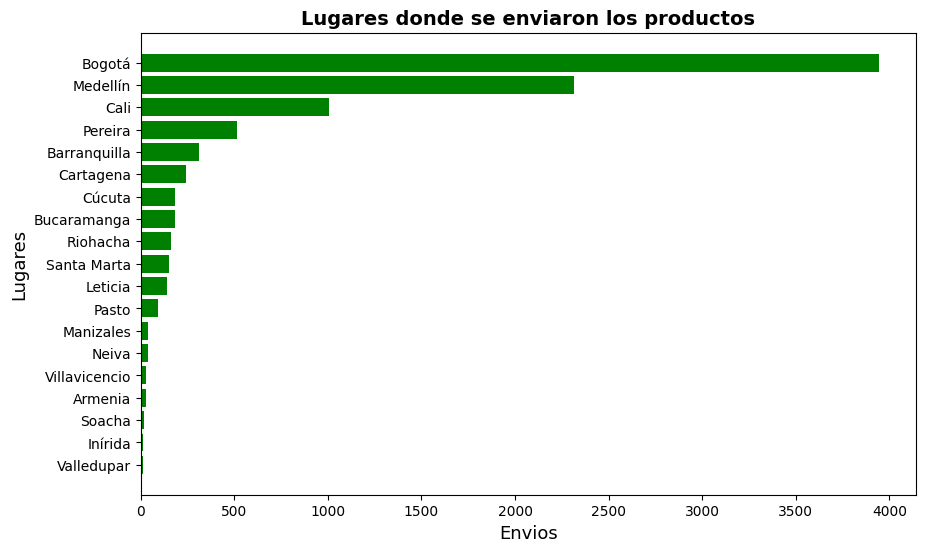

In [27]:
#creacion de grafica de lugares enviados del mayor al menor
plt.figure(figsize=(10, 6))
plt.barh(envios_lugares_enviados.index, envios_lugares_enviados.values, color='green',);
plt.gca().invert_yaxis()
#Etiquetas y titulos
plt.xlabel('Envios',fontsize=13);
plt.ylabel('Lugares',fontsize=13);
plt.title('Lugares donde se enviaron los productos',fontsize=14,fontweight='bold');


# Conclucion




🏆 Tienda 1
La Tienda 1 destaca como la que más genera en ventas y envíos, lo cual indica un fuerte rendimiento comercial. Sin embargo, presenta un nivel bajo de satisfacción por parte de los clientes.
Recomendación:
Se recomienda analizar en profundidad la experiencia del cliente, ya que la causa raíz de la insatisfacción no parece estar relacionada con los productos o precios, sino probablemente con el proceso de compra, atención al cliente o servicio postventa. Evaluar las opiniones y comentarios de los clientes será clave para identificar oportunidades de mejora.

📈 Tiendas 2 y 3
Estas tiendas presentan un alto nivel de satisfacción del cliente, pero generan bajos ingresos en comparación con la Tienda 1.
Recomendación:
Es necesario implementar estrategias enfocadas en incrementar las ventas, sin perder el estándar de atención al cliente. Las posibles causas de las bajas ventas podrían estar relacionadas con:

Ubicación desfavorable

Falta de stock

Menor visibilidad o promoción

Un análisis de mercado y logística podría ayudar a definir acciones concretas para potenciar su rendimiento comercial.

🚨 Tienda 4
La Tienda 4 muestra el peor desempeño general: es la que menos factura, con baja satisfacción del cliente y problemas en el servicio de envío.
Recomendación:
Se recomienda realizar un análisis completo de sus operaciones, enfocado en:

Calidad del servicio al cliente

Eficiencia del proceso de ventas

Evaluación de comentarios y sugerencias de clientes

Si no se identifican y corrigen las causas principales, esta tienda podría convertirse en una fuente de pérdidas insostenible y ser candidata a cierre.

Posibles causas raíz:

Bajo o mal gestionado stock disponible

Atención al cliente deficiente

Problemas en el seguimiento y entrega de productos